In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
#Read suicide dataset. Originially from: www.kaggle.com/russellyates88/suicide-rates-overview-1985-2016
dat = pd.read_csv('https://raw.githubusercontent.com/ndelcamp/IST_718_Project/master/master_dataset.csv')
display(dat.head())
print(dat.shape)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


(27820, 12)


In [3]:
#Merge in country code
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df = df.drop(columns = 'GDP (BILLIONS)')
dat = dat.merge(df, how = 'left', left_on = 'country', right_on = 'COUNTRY').drop(columns = 'COUNTRY')
dat.head()
print(dat.shape)

(27820, 13)


In [4]:
#Which countries do we not have codes for?
print('Countries without codes:', set(dat[dat.CODE.isna()].country))
#Russian Federation is just Russia: https://www.nationsonline.org/oneworld/russia.htm
#Republic of Korea is South Korea: https://en.wikipedia.org/wiki/South_Korea

dat.CODE[dat.country == 'Saint Vincent and Grenadines'] = 'VCT'
dat.CODE[dat.country == 'Bahamas'] = 'BHM'
dat.country[dat.country == 'Russian Federation'] = 'Russia'
dat.CODE[dat.country == 'Russia'] = 'RUS'
dat.CODE[dat.country == 'Republic of Korea'] = 'KOR'

print(dat.shape)

print('Countries without codes after fix:', set(dat[dat.CODE.isna()].country))

Countries without codes: {'Republic of Korea', 'Russian Federation', 'Saint Vincent and Grenadines', 'Bahamas'}


C:\Users\delc7\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\delc7\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\delc7\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\delc7\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from 

(27820, 13)
Countries without codes after fix: set()


C:\Users\delc7\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
#Lengths of unique categorical vars. If less than 10 unique levels, print them
for c in dat.select_dtypes(exclude = 'float64').columns:
    u = list(set([v for v in dat[c]]))
    if len(u) < 10:
        print(len(u), 'unique', c, ':', u)
    else:
        print(len(u), 'unique', c)

101 unique country
32 unique year
2 unique sex : ['female', 'male']
6 unique age : ['35-54 years', '55-74 years', '15-24 years', '25-34 years', '75+ years', '5-14 years']
2084 unique suicides_no
25564 unique population
2321 unique country-year
2321 unique  gdp_for_year ($) 
2233 unique gdp_per_capita ($)
6 unique generation : ['Generation Z', 'Millenials', 'G.I. Generation', 'Boomers', 'Silent', 'Generation X']
101 unique CODE


In [6]:
#How many missing values in each columns?
for c in dat.columns:
    print('missing ' + c + ': ' + str(dat[c].isna().sum()) + '; ' + str(int((dat[c].isna().sum() / len(dat)) * 100)) + '%')
    
#Human Development Index (HDI) is missing for 70% of records.

missing country: 0; 0%
missing year: 0; 0%
missing sex: 0; 0%
missing age: 0; 0%
missing suicides_no: 0; 0%
missing population: 0; 0%
missing suicides/100k pop: 0; 0%
missing country-year: 0; 0%
missing HDI for year: 19456; 69%
missing  gdp_for_year ($) : 0; 0%
missing gdp_per_capita ($): 0; 0%
missing generation: 0; 0%
missing CODE: 0; 0%


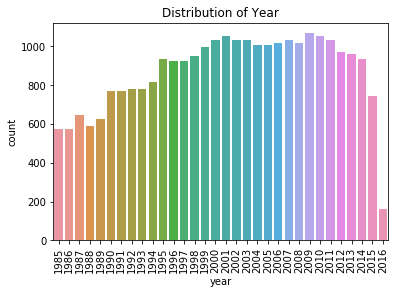

Unique years in dat:  {1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}


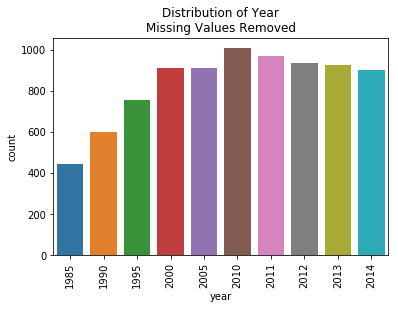

Unique years in dat (missing data removed): {1985, 1990, 1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014}

Years lost if we remove rows where HDI is missing: [1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2015, 2016]


In [7]:
#We should remove column 'HDI for year' whenever a model or other approch cannot use missing data

sns.countplot(dat.year)
plt.xticks(rotation = 90)
plt.title('Distribution of Year')
plt.show()
print('Unique years in dat: ', set(dat.year))

sns.countplot(dat.dropna(axis = 0).year)
plt.xticks(rotation = 90)
plt.title('Distribution of Year\nMissing Values Removed')
plt.show()
print('Unique years in dat (missing data removed):', set(dat.dropna(axis = 0).year))

missingy = [y for y in set(dat.year) if y not in set(dat.dropna(axis = 0).year)]
print('\nYears lost if we remove rows where HDI is missing:', missingy)


In [8]:
dat.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


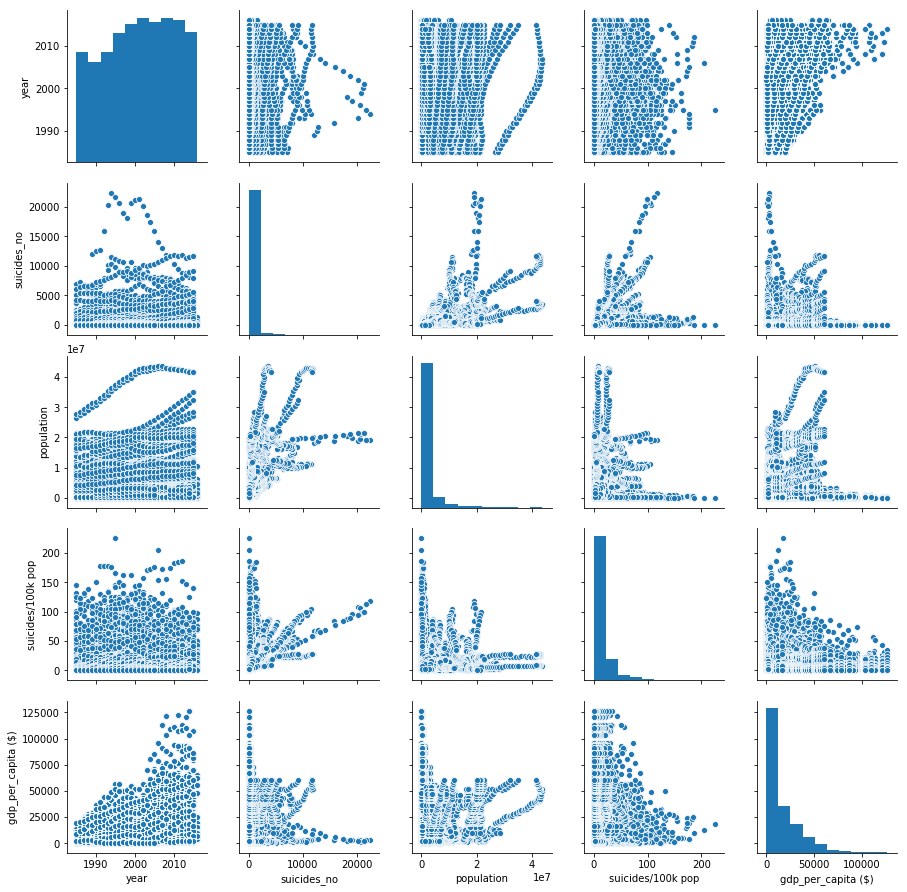

In [9]:
#Some notes on plots below:
#suicides_no is skewed left, meaning way more records have low suicides than high
#population is skewed left, meaning way more records have low populations
#gdp_per_capita ($) is skewed left, but not as much
#Positive relationship between year and gdp_per_capita
#There are ~15 records that appear to have much higher suicides_no. Look into those.
sns.pairplot(dat.drop(columns = ['HDI for year']))

In [10]:
dat_country = dat.drop(columns = ['year', 'HDI for year']).groupby(by = ['CODE', 'country']).mean()
dat_country['CODE'] = dat_country.index.get_level_values(0)
dat_country['country'] = dat_country.index.get_level_values(1)
dat_country.head()

,,suicides_no,population,suicides/100k pop,gdp_per_capita ($),CODE,country
CODE,country,,,,,,
ABW,Aruba,0.601190,7.498077e+03,9.503095,24221.642857,ABW,Aruba
ALB,Albania,7.462121,2.360813e+05,3.502879,1859.045455,ALB,Albania
ARE,United Arab Emirates,8.638889,5.069760e+05,1.317917,42162.000000,ARE,United Arab Emirates
ARG,Argentina,221.018817,2.784907e+06,10.469328,7914.096774,ARG,Argentina
ARM,Armenia,6.392617,2.595576e+05,3.275872,1873.919463,ARM,Armenia


In [11]:
#Plot average suicide by country (countries where we don't have data do not yet appear)

#Option to select year (Can't get the year slider to work and don't want to waste much time)
yearsSelected = None#range(2010, 2017) #This would be 2005 - 2011

plotly.tools.set_credentials_file(username = 'ndelcamp', api_key = 'wG2numNlud2pbqWlz6KK')

if yearsSelected is None:
    datGraph = dat_country
    label = ''
else:
    datGraph = dat[dat.year.isin(yearSelected)].drop(columns = ['year', 'HDI for year']).groupby(by = ['CODE', 'country']).mean()
    datGraph['CODE'] = datGraph.index.get_level_values(0)
    datGraph['country'] = datGraph.index.get_level_values(1)
    label = '<br>' + str(min(yearsSelected)) + '-' + str(max(yearsSelected))

data = [go.Choropleth(
    locations = datGraph['CODE'],
    z = datGraph['suicides/100k pop'],
    text = datGraph['country'],
    colorscale = [[0.0, 'rgb(165,0,38)'], 
                  [0.1111111111111111, 'rgb(215,48,39)'], 
                  [0.2222222222222222, 'rgb(244,109,67)'], 
                  [0.3333333333333333, 'rgb(253,174,97)'],
                  [0.4444444444444444, 'rgb(254,224,144)'],
                  [0.5555555555555556, 'rgb(224,243,248)'],
                  [0.6666666666666666, 'rgb(171,217,233)'],
                  [0.7777777777777778, 'rgb(116,173,209)'],
                  [0.8888888888888888, 'rgb(69,117,180)'],
                  [1.0, 'rgb(49,54,149)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'Suicides/100K People'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Suicides/100K People' + label
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig,filename = 'd3-world-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ndelcamp/0 or inside your plot.ly account where it is named 'd3-world-map'


In [12]:
#Explore gun ownership data
guns = pd.read_csv('https://raw.githubusercontent.com/ndelcamp/IST_718_Project/master/GunOwnership.csv')
display(guns.head())
guns = guns.drop(columns = ['Notes', 'Unnamed: 10'])
guns.columns = pd.Index(['country', 'civilianFirearmsPer100Persons', 'region', 'subregion', 'population2017', 
                        'civilianFirearmsCount', 'computationMethod', 'registeredFirearms', 'unregisteredFirearms'])
display(guns.head())
print(guns.shape)

,"Country (or dependent territory, subnationalarea, etc.)",Estimate of civilian firearms per 100 persons,Region,Subregion,Population 2017,Estimate of firearms in civilian possession,Computation method,Registered firearms,Unregistered firearms,Notes,Unnamed: 10
0,United States,120.5,Americas,Northern America,"326,474,000","393,347,000",1,"1,073,743","392,273,257",[note 2],NaN
1,Falkland Islands,62.1,Americas,South America,"3,000","2,000",2,"1,705",295,NaN,NaN
2,Yemen,52.8,Asia,Western Asia,"28,120,000","14,859,000",2,NaN,NaN,NaN,NaN
3,New Caledonia,42.5,Oceania,Melanesia,"270,000","115,000",2,"55,000","60,000",NaN,NaN
4,Montenegro,39.1,Europe,Southern Europe,"626,000","245,000",3,"103,536","141,464",NaN,NaN


,country,civilianFirearmsPer100Persons,region,subregion,population2017,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms
0,United States,120.5,Americas,Northern America,"326,474,000","393,347,000",1,"1,073,743","392,273,257"
1,Falkland Islands,62.1,Americas,South America,"3,000","2,000",2,"1,705",295
2,Yemen,52.8,Asia,Western Asia,"28,120,000","14,859,000",2,NaN,NaN
3,New Caledonia,42.5,Oceania,Melanesia,"270,000","115,000",2,"55,000","60,000"
4,Montenegro,39.1,Europe,Southern Europe,"626,000","245,000",3,"103,536","141,464"


(230, 9)


In [13]:
#Remove all commas and - signs. Countries have '\xa0'
def clean_guns(string):
    if type(string) is str:
        return(string.replace(',','').replace('-', '').replace('\xa0', ''))
    else:
        return(string)

guns = guns.applymap(clean_guns)
guns.head()

,country,civilianFirearmsPer100Persons,region,subregion,population2017,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms
0,United States,120.5,Americas,Northern America,326474000,393347000,1,1073743,392273257
1,Falkland Islands,62.1,Americas,South America,3000,2000,2,1705,295
2,Yemen,52.8,Asia,Western Asia,28120000,14859000,2,NaN,NaN
3,New Caledonia,42.5,Oceania,Melanesia,270000,115000,2,55000,60000
4,Montenegro,39.1,Europe,Southern Europe,626000,245000,3,103536,141464


In [14]:
#Convert numeric columns from str to numeric. Include bonus to change from float to np.float. Not sure if it matter
guns[['civilianFirearmsPer100Persons', 'population2017', 'civilianFirearmsCount', 'registeredFirearms', 'unregisteredFirearms']] = guns[['civilianFirearmsPer100Persons', 'population2017', 'civilianFirearmsCount', 'registeredFirearms', 'unregisteredFirearms']].apply(pd.to_numeric)
guns.head()

,country,civilianFirearmsPer100Persons,region,subregion,population2017,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms
0,United States,120.5,Americas,Northern America,326474000,393347000.0,1,1073743.0,392273257.0
1,Falkland Islands,62.1,Americas,South America,3000,2000.0,2,1705.0,295.0
2,Yemen,52.8,Asia,Western Asia,28120000,14859000.0,2,NaN,NaN
3,New Caledonia,42.5,Oceania,Melanesia,270000,115000.0,2,55000.0,60000.0
4,Montenegro,39.1,Europe,Southern Europe,626000,245000.0,3,103536.0,141464.0


In [15]:
#How many missing values in each columns?
for c in guns.columns:
    print('missing ' + c + ': ' + str(guns[c].isna().sum()) + '; ' + str(int((guns[c].isna().sum() / len(guns)) * 100)) + '%')
    
#Missing 40% of registered and unregistered firearms.

missing country: 0; 0%
missing civilianFirearmsPer100Persons: 0; 0%
missing region: 0; 0%
missing subregion: 0; 0%
missing population2017: 0; 0%
missing civilianFirearmsCount: 3; 1%
missing computationMethod: 0; 0%
missing registeredFirearms: 94; 40%
missing unregisteredFirearms: 94; 40%


In [16]:
#Lengths of unique categorical vars. If less than 10 unique levels, print them
for c in guns.select_dtypes(exclude = ['float64', 'int64']).columns:
    u = list(set([v for v in guns[c]]))
    if len(u) < 10:
        print(len(u), 'unique', c, ':', u)
    else:
        print(len(u), 'unique', c)

229 unique country
5 unique region : ['Europe', 'Africa', 'Asia', 'Oceania', 'Americas']
23 unique subregion


,civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms
count,230.000000,2.300000e+02,2.270000e+02,230.000000,1.360000e+02,1.360000e+02
mean,9.808261,3.268977e+07,3.777075e+06,2.113043,7.347404e+05,5.029361e+06
std,12.461026,1.321556e+08,2.689460e+07,0.549159,1.590962e+06,3.431910e+07
min,0.000000,1.000000e+03,1.000000e+02,1.000000,4.800000e+01,5.000000e+01
25%,2.100000,6.060000e+05,3.450000e+04,2.000000,1.647000e+04,5.616750e+04
50%,5.900000,5.522000e+06,2.450000e+05,2.000000,1.421490e+05,2.533020e+05
75%,13.525000,2.048825e+07,1.142500e+06,2.000000,5.419222e+05,8.167750e+05
max,120.500000,1.388233e+09,3.933470e+08,3.000000,9.700000e+06,3.922733e+08


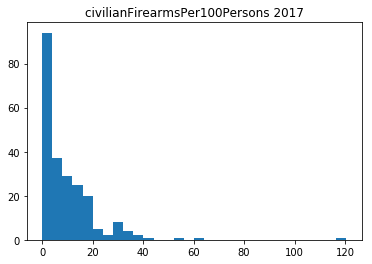

In [17]:
display(guns.describe())
plt.hist(guns.civilianFirearmsPer100Persons, bins = 30)
plt.title('civilianFirearmsPer100Persons 2017')
plt.show()

C:\Users\delc7\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\delc7\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



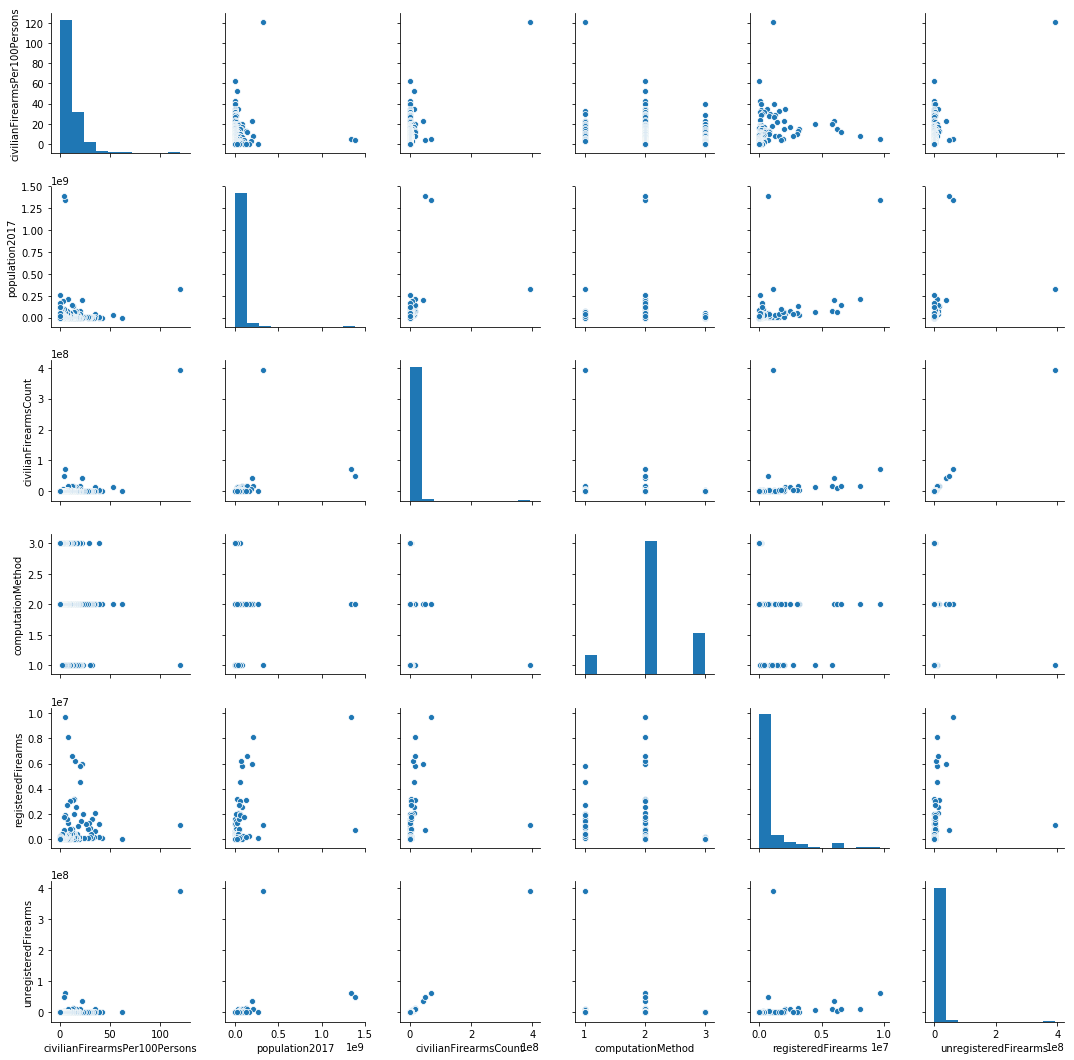

In [18]:
sns.pairplot(guns)

In [19]:
#Which countries in dat are not in guns?
print([c for c in list(set(dat.country)) if c not in list(set(guns.country))])

#'Cabo Verde' in dat is 'Cape Verde' in guns
#'Republic of Korea' in dat is 'South Korea' in guns
#'United Kingdom' in dat is 'England and Wales' + 'Scotland' + 'Northern Ireland' in guns
#'Saint Vincent and Grenadines' in dat is 'Saint Vincent and the Grenadines' in guns

['Saint Vincent and Grenadines', 'United Kingdom', 'Republic of Korea', 'Cabo Verde']


In [20]:
#Correct UK groups to just UK
gunsUK = guns[guns.country.isin(['England and Wales', 'Scotland', 'Northern Ireland'])]
gunsUK.civilianFirearmsPer100Persons.mean()
#region is Europe
#subregions is Northern Europe
gunsUK.population2017.sum()
gunsUK.civilianFirearmsCount.sum()
#gunsUK.computationMethod is 1 for all
gunsUK.registeredFirearms.sum()
gunsUK.unregisteredFirearms.sum()


1031265.0

In [21]:
guns.tail()

,country,civilianFirearmsPer100Persons,region,subregion,population2017,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms
225,Christmas Island,0.0,Asia,Southeastern Asia,2000,NaN,2,NaN,NaN
226,Holy See,0.0,Europe,Southern Europe,1000,NaN,2,NaN,NaN
227,Indonesia,0.0,Asia,Southeastern Asia,263510000,82000.0,2,41102.0,40898.0
228,Nauru,0.0,Oceania,Melanesia,10000,NaN,2,NaN,NaN
229,Taiwan,0.0,Asia,Eastern Asia,23405000,10000.0,2,5000.0,5000.0


In [22]:
#NEXT STEPS: FINISH FIXING THE COUNTRIES IN DAT NOT IN GUNS. COMBINE UK AND RENAME OTHER 3
#MERGE GUNS TO DAT
#KMEANS, REGRESSION, TIME SERIES, MORE DATA?